In [3]:
# Import the important libraries
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# current directory
!pwd

/home/ec2-user/SageMaker/Zillow_data_Analysis


In [6]:
# list of the files in the directory
!ls

dask-worker-space		sample_submission.csv
Metro_Zhvi_AllHomes.csv		train_2016_v2.csv
properties_2016.csv		train_2017.csv
properties_2017.csv		Zillow-basic-analysis.ipynb
redfin_2019-03-11-17-15-17.csv


### Load properties 2016 and 2017 together

In [6]:
df_properties_16_17 = pd.concat([pd.read_csv("properties_2016.csv"), pd.read_csv("properties_2017.csv")])
pd.set_option('display.max_columns', None)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_properties_16_17.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [10]:
df_properties_16_17.shape

(5970434, 58)

In [11]:
df_properties_16_17.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [12]:
df_properties_16_17.isna().sum()

parcelid                              0
airconditioningtypeid           4343553
architecturalstyletypeid        5958312
basementsqft                    5967179
bathroomcnt                       14419
bedroomcnt                        14395
buildingclasstypeid             5945074
buildingqualitytypeid           2090551
calculatedbathnbr                246068
decktypeid                      5935959
finishedfloor1squarefeet        5563959
calculatedfinishedsquarefeet     100662
finishedsquarefeet12             540464
finishedsquarefeet13            5955091
finishedsquarefeet15            5589451
finishedsquarefeet50            5563959
finishedsquarefeet6             5926951
fips                              14369
fireplacecnt                    5344673
fullbathcnt                      246068
garagecarcnt                    4196159
garagetotalsqft                 4196159
hashottuborspa                  5851358
heatingorsystemtypeid           2294869
latitude                          14369


In [13]:
df_properties_16_17.isnull().sum()

parcelid                              0
airconditioningtypeid           4343553
architecturalstyletypeid        5958312
basementsqft                    5967179
bathroomcnt                       14419
bedroomcnt                        14395
buildingclasstypeid             5945074
buildingqualitytypeid           2090551
calculatedbathnbr                246068
decktypeid                      5935959
finishedfloor1squarefeet        5563959
calculatedfinishedsquarefeet     100662
finishedsquarefeet12             540464
finishedsquarefeet13            5955091
finishedsquarefeet15            5589451
finishedsquarefeet50            5563959
finishedsquarefeet6             5926951
fips                              14369
fireplacecnt                    5344673
fullbathcnt                      246068
garagecarcnt                    4196159
garagetotalsqft                 4196159
hashottuborspa                  5851358
heatingorsystemtypeid           2294869
latitude                          14369


### Let's count the missing value and also reset the index

In [7]:
df_missing_values = df_properties_16_17.isnull().sum(axis=0).reset_index()
df_missing_values.columns=['column_name', 'missing_count']
df_missing_values=df_missing_values.ix[df_missing_values['missing_count']>0]
df_missing_values=df_missing_values.sort_values(by='missing_count')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [9]:
df_missing_values.head(10)

,column_name,missing_count
35,rawcensustractandblock,14369
25,longitude,14369
24,latitude,14369
37,regionidcounty,14369
17,fips,14369
33,propertylandusetypeid,14369
52,assessmentyear,14372
5,bedroomcnt,14395
4,bathroomcnt,14419
40,roomcnt,14444


### visualize the missing value count

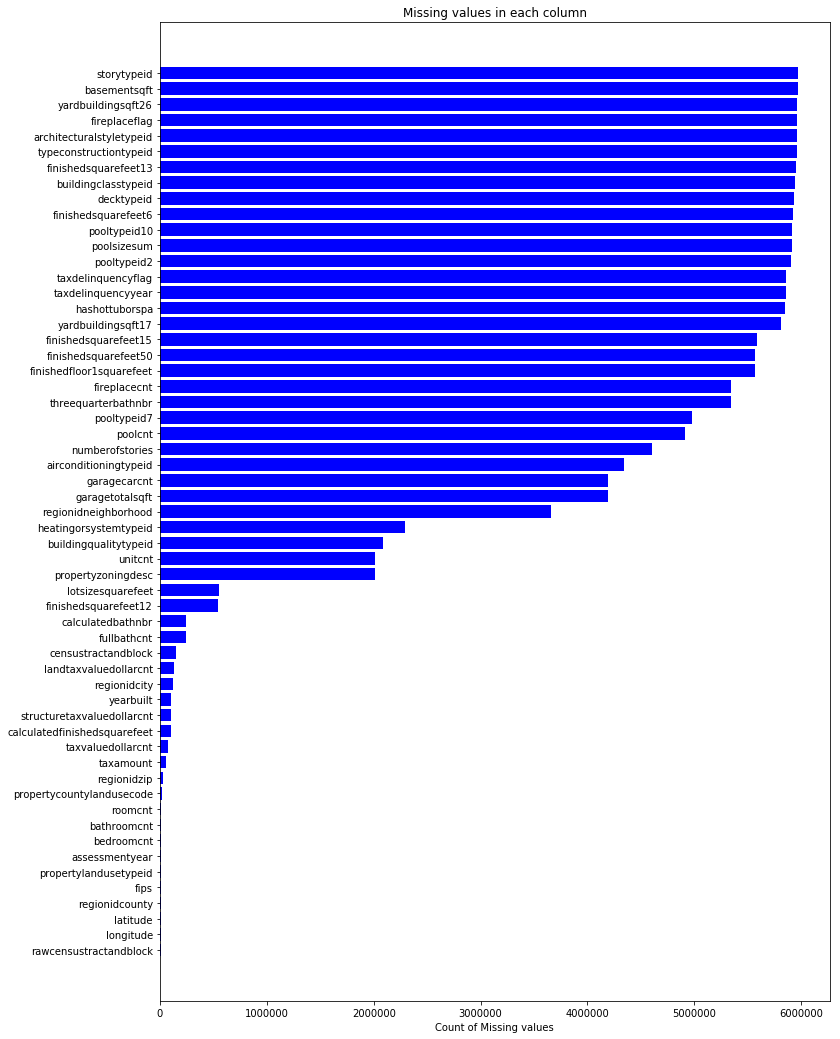

In [8]:
#  Let's plot the missing values
ind = np.arange(df_missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (12,18))
rects = ax.barh(ind, df_missing_values.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df_missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of Missing values")
ax.set_title("Missing values in each column")
plt.show()


In [9]:
df_properties_16_17.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

### make a new file of relevant columns with least missing values

In [10]:
df_selected_columns = df_properties_16_17[['rawcensustractandblock','lotsizesquarefeet','latitude', 'longitude', 'regionidcounty', 'fips',
                                         'propertylandusetypeid', 'assessmentyear', 'bedroomcnt', 'bathroomcnt', 'roomcnt',
                                         'regionidzip', 'taxamount', 'landtaxvaluedollarcnt',
                                          'regionidcity', 'yearbuilt', 'structuretaxvaluedollarcnt', 'calculatedfinishedsquarefeet',
                                          'taxvaluedollarcnt']]

In [11]:
df_selected_columns.head(10)

,rawcensustractandblock,lotsizesquarefeet,latitude,longitude,regionidcounty,fips,propertylandusetypeid,assessmentyear,bedroomcnt,bathroomcnt,roomcnt,regionidzip,taxamount,landtaxvaluedollarcnt,regionidcity,yearbuilt,structuretaxvaluedollarcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,6.037800e+07,85768.0,34144442.0,-118654084.0,3101.0,6037.0,269.0,2015.0,0.0,0.0,0.0,96337.0,NaN,9.0,37688.0,NaN,NaN,NaN,9.0
1,6.037800e+07,4083.0,34140430.0,-118625364.0,3101.0,6037.0,261.0,2015.0,0.0,0.0,0.0,96337.0,NaN,27516.0,37688.0,NaN,NaN,NaN,27516.0
2,6.037703e+07,63085.0,33989359.0,-118394633.0,3101.0,6037.0,47.0,2015.0,0.0,0.0,0.0,96095.0,20800.37,762631.0,51617.0,NaN,650756.0,73026.0,1413387.0
3,6.037141e+07,7521.0,34148863.0,-118437206.0,3101.0,6037.0,47.0,2015.0,0.0,0.0,0.0,96424.0,14557.57,585488.0,12447.0,1948.0,571346.0,5068.0,1156834.0
4,6.037123e+07,8512.0,34194168.0,-118385816.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96450.0,5725.17,239695.0,12447.0,1947.0,193796.0,1776.0,433491.0
5,6.037125e+07,2500.0,34171873.0,-118380906.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96446.0,3661.28,106932.0,12447.0,1943.0,176383.0,2400.0,283315.0
6,6.037144e+07,NaN,34131929.0,-118351474.0,3101.0,6037.0,260.0,2015.0,0.0,0.0,0.0,96049.0,6773.34,156628.0,12447.0,NaN,397945.0,NaN,554573.0
7,6.037311e+07,5333.0,34171345.0,-118314900.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96434.0,7857.84,586488.0,396054.0,1946.0,101998.0,3611.0,688486.0
8,6.037310e+07,145865.0,34218210.0,-118331311.0,3101.0,6037.0,269.0,2015.0,0.0,0.0,0.0,96436.0,NaN,9.0,396054.0,NaN,NaN,NaN,9.0
9,6.037320e+07,7494.0,34289776.0,-118432085.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96366.0,4054.76,42761.0,47547.0,1978.0,218440.0,3754.0,261201.0


In [123]:
df_selected_columns.isna().sum()

rawcensustractandblock           14369
lotsizesquarefeet               548805
latitude                         14369
longitude                        14369
regionidcounty                   14369
fips                             14369
propertylandusetypeid            14369
assessmentyear                   14372
bedroomcnt                       14395
bathroomcnt                      14419
roomcnt                          14444
regionidzip                      26694
taxamount                        54002
landtaxvaluedollarcnt           127659
regionidcity                    124973
yearbuilt                       107761
structuretaxvaluedollarcnt      101446
calculatedfinishedsquarefeet    100662
taxvaluedollarcnt                76816
dtype: int64

In [83]:
df_selected_columns.dtypes

rawcensustractandblock          float64
lotsizesquarefeet               float64
latitude                        float64
longitude                       float64
regionidcounty                  float64
fips                            float64
propertylandusetypeid           float64
assessmentyear                  float64
bedroomcnt                      float64
bathroomcnt                     float64
roomcnt                         float64
regionidzip                     float64
taxamount                       float64
landtaxvaluedollarcnt           float64
regionidcity                    float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
dtype: object

In [124]:
df_selected_columns.shape

(5970434, 19)

In [125]:
df_selected_columns.lotsizesquarefeet.describe()


count    5.421629e+06
mean     2.271321e+04
std      2.970086e+05
min      1.000000e+02
25%      5.686000e+03
50%      7.000000e+03
75%      9.896000e+03
max      3.710005e+08
Name: lotsizesquarefeet, dtype: float64

In [12]:
# nba["College"].fillna("No College", inplace = True
df_selected_columns['lotsizesquarefeet'].fillna(0, inplace=True)                      

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
df_selected_columns['lotsizesquarefeet'].fillna(df_selected_columns['lotsizesquarefeet'].mean(), inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
df_selected_columns.lotsizesquarefeet.isna().sum()

0

### Drop all NaNs

In [15]:
df_no_na = df_selected_columns.dropna()

In [16]:
df_no_na.isna().sum()

rawcensustractandblock          0
lotsizesquarefeet               0
latitude                        0
longitude                       0
regionidcounty                  0
fips                            0
propertylandusetypeid           0
assessmentyear                  0
bedroomcnt                      0
bathroomcnt                     0
roomcnt                         0
regionidzip                     0
taxamount                       0
landtaxvaluedollarcnt           0
regionidcity                    0
yearbuilt                       0
structuretaxvaluedollarcnt      0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
dtype: int64

In [131]:
df_no_na.shape

(5682381, 19)

### Create an apprasied value column combining land appraised value and built structure value

In [17]:
df_no_na['appraised_value_y'] = df_no_na['structuretaxvaluedollarcnt'] + df_no_na['landtaxvaluedollarcnt'] 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
df_no_na.head(10)

,rawcensustractandblock,lotsizesquarefeet,latitude,longitude,regionidcounty,fips,propertylandusetypeid,assessmentyear,bedroomcnt,bathroomcnt,roomcnt,regionidzip,taxamount,landtaxvaluedollarcnt,regionidcity,yearbuilt,structuretaxvaluedollarcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,appraised_value_y
3,6.037141e+07,7521.0,34148863.0,-118437206.0,3101.0,6037.0,47.0,2015.0,0.0,0.0,0.0,96424.0,14557.57,585488.0,12447.0,1948.0,571346.0,5068.0,1156834.0,1156834.0
4,6.037123e+07,8512.0,34194168.0,-118385816.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96450.0,5725.17,239695.0,12447.0,1947.0,193796.0,1776.0,433491.0,433491.0
5,6.037125e+07,2500.0,34171873.0,-118380906.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96446.0,3661.28,106932.0,12447.0,1943.0,176383.0,2400.0,283315.0,283315.0
7,6.037311e+07,5333.0,34171345.0,-118314900.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96434.0,7857.84,586488.0,396054.0,1946.0,101998.0,3611.0,688486.0,688486.0
9,6.037320e+07,7494.0,34289776.0,-118432085.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96366.0,4054.76,42761.0,47547.0,1978.0,218440.0,3754.0,261201.0,261201.0
10,6.037111e+07,3423.0,34265214.0,-118520217.0,3101.0,6037.0,47.0,2015.0,0.0,0.0,0.0,96370.0,6014.18,184374.0,12447.0,1958.0,245834.0,2470.0,430208.0,430208.0
17,6.037901e+07,8856.0,34690736.0,-118135225.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,97317.0,2330.24,29770.0,5534.0,1949.0,32654.0,2760.0,62424.0,62424.0
18,6.037900e+07,46526.0,34733960.0,-118139298.0,3101.0,6037.0,260.0,2015.0,0.0,0.0,0.0,97318.0,4162.56,45649.0,5534.0,1956.0,56736.0,4000.0,102385.0,102385.0
19,6.037910e+07,9826.0,34560018.0,-118169806.0,3101.0,6037.0,261.0,2015.0,4.0,2.0,0.0,97329.0,6941.39,72991.0,40227.0,2005.0,218982.0,3633.0,291973.0,291973.0
20,6.037235e+07,8050.0,33986910.0,-118329553.0,3101.0,6037.0,31.0,2015.0,0.0,0.0,0.0,96024.0,6840.34,306153.0,12447.0,1957.0,197599.0,4053.0,503752.0,503752.0


In [28]:
df_no_na.shape

(5682381, 19)

### drop these columns

In [18]:
df_no_na = df_no_na.drop(columns=['rawcensustractandblock','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt' ])

### Rename all the columns

In [19]:
df_no_na.columns

Index(['lotsizesquarefeet', 'latitude', 'longitude', 'regionidcounty', 'fips',
       'propertylandusetypeid', 'assessmentyear', 'bedroomcnt', 'bathroomcnt',
       'roomcnt', 'regionidzip', 'taxamount', 'regionidcity', 'yearbuilt',
       'calculatedfinishedsquarefeet', 'appraised_value_y'],
      dtype='object')

In [20]:
df_no_na = df_no_na.rename(columns = {'lotsizesquarefeet':'TOTAL_LOT_AREA_SQFT','latitude': 'LATITUDE', 'longitude' : 'LONGITUDE', 'regionidcounty':'COUNTYID', 'fips':'FED_CODE',
       'propertylandusetypeid' :'LAND_USE_TYPE', 'assessmentyear' :'YEAR_ASSESSMENT', 'bedroomcnt':'BEDS', 'bathroomcnt': 'BATHS',
       'roomcnt' : 'TOTAL_ROOMS', 'regionidzip' :'ZIP', 'taxamount' :'ASSESSED_PROPERTY_TAXES',
       'regionidcity': 'CITY_ID', 'yearbuilt' :'YEAR_BUILT', 'calculatedfinishedsquarefeet' :'SQAURE_FEET_HOUSE',
       'appraised_value_y' :'APPRAISED_VALUE'})

In [21]:
df_no_na.columns

Index(['TOTAL_LOT_AREA_SQFT', 'LATITUDE', 'LONGITUDE', 'COUNTYID', 'FED_CODE',
       'LAND_USE_TYPE', 'YEAR_ASSESSMENT', 'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ZIP', 'ASSESSED_PROPERTY_TAXES', 'CITY_ID', 'YEAR_BUILT',
       'SQAURE_FEET_HOUSE', 'APPRAISED_VALUE'],
      dtype='object')

In [22]:
df_no_na.dtypes

TOTAL_LOT_AREA_SQFT        float64
LATITUDE                   float64
LONGITUDE                  float64
COUNTYID                   float64
FED_CODE                   float64
LAND_USE_TYPE              float64
YEAR_ASSESSMENT            float64
BEDS                       float64
BATHS                      float64
TOTAL_ROOMS                float64
ZIP                        float64
ASSESSED_PROPERTY_TAXES    float64
CITY_ID                    float64
YEAR_BUILT                 float64
SQAURE_FEET_HOUSE          float64
APPRAISED_VALUE            float64
dtype: object

### Change the data type of some columns

In [23]:
df_no_na['COUNTYID'] = df_no_na['COUNTYID'].astype(np.int)
df_no_na['FED_CODE'] = df_no_na['FED_CODE'].astype(np.int)
df_no_na['LAND_USE_TYPE'] = df_no_na['LAND_USE_TYPE'].astype(np.int)
df_no_na['BEDS'] = df_no_na['BEDS'].astype(np.int)
df_no_na['TOTAL_ROOMS'] = df_no_na['TOTAL_ROOMS'].astype(np.int)
df_no_na['ZIP'] = df_no_na['ZIP'].astype(np.int)
df_no_na['YEAR_BUILT'] = df_no_na['YEAR_BUILT'].astype(np.int)
df_no_na['CITY_ID'] = df_no_na['CITY_ID'].astype(np.int)
df_no_na['YEAR_ASSESSMENT'] = df_no_na['YEAR_ASSESSMENT'].astype(np.int)

In [ ]:
# df_no_na_int = df_no_na.astype(np.int)       

In [24]:
df_no_na.head()

,TOTAL_LOT_AREA_SQFT,LATITUDE,LONGITUDE,COUNTYID,FED_CODE,LAND_USE_TYPE,YEAR_ASSESSMENT,BEDS,BATHS,TOTAL_ROOMS,ZIP,ASSESSED_PROPERTY_TAXES,CITY_ID,YEAR_BUILT,SQAURE_FEET_HOUSE,APPRAISED_VALUE
3,7521.0,34148863.0,-118437206.0,3101,6037,47,2015,0,0.0,0,96424,14557.57,12447,1948,5068.0,1156834.0
4,8512.0,34194168.0,-118385816.0,3101,6037,31,2015,0,0.0,0,96450,5725.17,12447,1947,1776.0,433491.0
5,2500.0,34171873.0,-118380906.0,3101,6037,31,2015,0,0.0,0,96446,3661.28,12447,1943,2400.0,283315.0
7,5333.0,34171345.0,-118314900.0,3101,6037,31,2015,0,0.0,0,96434,7857.84,396054,1946,3611.0,688486.0
9,7494.0,34289776.0,-118432085.0,3101,6037,31,2015,0,0.0,0,96366,4054.76,47547,1978,3754.0,261201.0


In [79]:
df_no_na.shape

(5682381, 15)

In [25]:
df_no_na.corr()

,TOTAL_LOT_AREA_SQFT,LATITUDE,LONGITUDE,COUNTYID,FED_CODE,LAND_USE_TYPE,YEAR_ASSESSMENT,BEDS,BATHS,TOTAL_ROOMS,ZIP,ASSESSED_PROPERTY_TAXES,CITY_ID,YEAR_BUILT,SQAURE_FEET_HOUSE,APPRAISED_VALUE
TOTAL_LOT_AREA_SQFT,1.000000,0.030046,-0.018365,0.030664,-0.022651,0.013521,-0.000379,-0.022101,0.007842,-0.021640,0.001036,0.002238,-0.004860,0.030159,-0.001436,0.001925
LATITUDE,0.030046,1.000000,-0.576031,0.568426,-0.043041,-0.006913,-0.000310,0.033263,0.010396,-0.233540,0.001683,-0.047743,0.001239,-0.024799,-0.004362,-0.068529
LONGITUDE,-0.018365,-0.576031,1.000000,-0.367010,-0.351965,0.014364,0.000304,0.003520,-0.012253,-0.025820,0.032190,-0.026211,0.010872,0.074248,-0.009632,-0.023004
COUNTYID,0.030664,0.568426,-0.367010,1.000000,-0.621595,-0.069372,-0.000669,-0.011348,-0.026782,-0.710314,-0.067928,-0.009625,0.061005,-0.312812,-0.026350,-0.035196
FED_CODE,-0.022651,-0.043041,-0.351965,-0.621595,1.000000,0.052992,0.000469,0.024837,0.011795,0.716856,0.055472,-0.016948,-0.048643,0.261837,0.019499,0.006420
LAND_USE_TYPE,0.013521,-0.006913,0.014364,-0.069372,0.052992,1.000000,-0.000083,0.080325,0.114544,0.045782,0.010321,-0.084247,-0.009790,0.166799,-0.226317,-0.073523
YEAR_ASSESSMENT,-0.000379,-0.000310,0.000304,-0.000669,0.000469,-0.000083,1.000000,0.000751,0.001823,-0.000074,0.000098,0.001726,-0.000120,0.001961,0.000902,0.016054
BEDS,-0.022101,0.033263,0.003520,-0.011348,0.024837,0.080325,0.000751,1.000000,0.654611,0.144335,0.011890,0.160437,-0.018374,0.070851,0.258805,0.161110
BATHS,0.007842,0.010396,-0.012253,-0.026782,0.011795,0.114544,0.001823,0.654611,1.000000,0.039685,0.021620,0.353023,-0.034030,0.357644,0.348964,0.361031
TOTAL_ROOMS,-0.021640,-0.233540,-0.025820,-0.710314,0.716856,0.045782,-0.000074,0.144335,0.039685,1.000000,0.051901,-0.024690,-0.053824,0.139989,0.036579,0.001141


In [142]:
df_no_na.columns

Index(['TOTAL_LOT_AREA_SQFT', 'LATITUDE', 'LONGITUDE', 'COUNTYID', 'FED_CODE',
       'LAND_USE_TYPE', 'YEAR_ASSESSMENT', 'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ZIP', 'ASSESSED_PROPERTY_TAXES', 'CITY_ID', 'YEAR_BUILT',
       'SQAURE_FEET_HOUSE', 'APPRAISED_VALUE'],
      dtype='object')

### pair plots (taking very long time, skip this for now)

In [ ]:
import seaborn as sns 
cols = ['APPRAISED_VALUE','TOTAL_LOT_AREA_SQFT',
        'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ASSESSED_PROPERTY_TAXES', 'YEAR_BUILT', 'SQAURE_FEET_HOUSE'
       ]

sns.pairplot(df_no_na[cols], size=2.5)
plt.tight_layout()
plt.show()

In [26]:
df_no_na.COUNTYID.value_counts()

3101    3865269
1286    1400291
2061     416821
Name: COUNTYID, dtype: int64

### Define X matrix and y vector

In [28]:
# let's define our X and y
X = df_no_na[['TOTAL_LOT_AREA_SQFT', 'LATITUDE', 'LONGITUDE', 'COUNTYID', 'FED_CODE',
       'LAND_USE_TYPE', 'YEAR_ASSESSMENT', 'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ZIP', 'ASSESSED_PROPERTY_TAXES', 'CITY_ID', 'YEAR_BUILT',
       'SQAURE_FEET_HOUSE',
        ]]

In [29]:
X.head()

,TOTAL_LOT_AREA_SQFT,LATITUDE,LONGITUDE,COUNTYID,FED_CODE,LAND_USE_TYPE,YEAR_ASSESSMENT,BEDS,BATHS,TOTAL_ROOMS,ZIP,ASSESSED_PROPERTY_TAXES,CITY_ID,YEAR_BUILT,SQAURE_FEET_HOUSE
3,7521.0,34148863.0,-118437206.0,3101,6037,47,2015,0,0.0,0,96424,14557.57,12447,1948,5068.0
4,8512.0,34194168.0,-118385816.0,3101,6037,31,2015,0,0.0,0,96450,5725.17,12447,1947,1776.0
5,2500.0,34171873.0,-118380906.0,3101,6037,31,2015,0,0.0,0,96446,3661.28,12447,1943,2400.0
7,5333.0,34171345.0,-118314900.0,3101,6037,31,2015,0,0.0,0,96434,7857.84,396054,1946,3611.0
9,7494.0,34289776.0,-118432085.0,3101,6037,31,2015,0,0.0,0,96366,4054.76,47547,1978,3754.0


### y vector

In [30]:
y = df_no_na['APPRAISED_VALUE']

In [31]:
y.head()

3    1156834.0
4     433491.0
5     283315.0
7     688486.0
9     261201.0
Name: APPRAISED_VALUE, dtype: float64

In [ ]:
X.shape, y.shape

### Split the data into train and test sets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4261785, 15), (1420596, 15), (4261785,), (1420596,))

In [ ]:
y_test

### Simple Linear Regression as a baseline model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_test_predict = model.predict(X_test)

In [36]:
y_test_predict.shape

(1420596,)

In [37]:
MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
print('R^2 is {}'.format(R2))
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

MSE is 16795355308.758034
RMSE is 129596.8954441349
Test set score: 0.96
R^2 is 0.96392975534906
Coefficient: 
 [ 5.94952670e-04 -6.76349687e-02 -8.11247252e-03  3.97179955e+00
  4.63568254e+02  3.59537493e+02  1.98082005e+04 -9.83670411e+03
  1.87161171e+04  3.33291285e+03 -1.97228616e-01  7.93892691e+01
  4.62456995e-02 -7.62484134e+01  5.56091338e+00]

 Intercept:  -41347023.392045796


## Random Forests

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

X = df_no_na[['TOTAL_LOT_AREA_SQFT', 'LATITUDE', 'LONGITUDE', 'COUNTYID', 'FED_CODE',
       'LAND_USE_TYPE', 'YEAR_ASSESSMENT', 'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ZIP', 'ASSESSED_PROPERTY_TAXES', 'CITY_ID', 'YEAR_BUILT',
       'SQAURE_FEET_HOUSE',
        ]]
y = df_no_na['APPRAISED_VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, shuffle=True)


m = RandomForestRegressor(max_depth=7, random_state=42, n_estimators=100)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)



In [50]:
MSE = mean_squared_error(y_test, y_pred)

RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("Test set score: {:.2f}".format(m.score(X_test, y_test)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_pred)

print('R^2 is {}'.format(R2))

Test set score: 0.96
MSE is 17935629155.660572
RMSE is 133923.96781629705
R^2 is 0.9614808666015028


### Our linear regression seems to be doing better than Random forests

## Let's remove the outliers

In [43]:
from scipy import stats

In [44]:
df_no_outliers = df_no_na[(np.abs(stats.zscore(df_no_na))<3).all(axis=1)]

In [45]:
df_no_outliers.head()


,TOTAL_LOT_AREA_SQFT,LATITUDE,LONGITUDE,COUNTYID,FED_CODE,LAND_USE_TYPE,YEAR_ASSESSMENT,BEDS,BATHS,TOTAL_ROOMS,ZIP,ASSESSED_PROPERTY_TAXES,CITY_ID,YEAR_BUILT,SQAURE_FEET_HOUSE,APPRAISED_VALUE
19,9826.0,34560018.0,-118169806.0,3101,6037,261,2015,4,2.0,0,97329,6941.39,40227,2005,3633.0,291973.0
26,4990.0,33879216.0,-118361434.0,3101,6037,246,2015,5,4.0,0,96124,10455.41,33612,1972,2865.0,818739.0
28,40247.0,33974100.0,-118423000.0,3101,6037,266,2015,2,2.0,0,96072,6165.36,12447,2004,1090.0,352198.0
29,0.0,33996200.0,-118438000.0,3101,6037,261,2015,3,4.0,0,96047,10244.94,12447,2011,1620.0,835036.0
31,6490.0,34012977.0,-118479243.0,3101,6037,261,2015,3,2.0,0,96152,7924.68,26964,1926,2077.0,637046.0


In [46]:
df_no_outliers.shape

(4985112, 16)

In [48]:
df_no_outliers.corr()

,TOTAL_LOT_AREA_SQFT,LATITUDE,LONGITUDE,COUNTYID,FED_CODE,LAND_USE_TYPE,YEAR_ASSESSMENT,BEDS,BATHS,TOTAL_ROOMS,ZIP,ASSESSED_PROPERTY_TAXES,CITY_ID,YEAR_BUILT,SQAURE_FEET_HOUSE,APPRAISED_VALUE
TOTAL_LOT_AREA_SQFT,1.000000,0.144249,-0.166492,0.141584,-0.141584,0.204102,-0.000223,-0.141009,0.022284,-0.093588,-0.080372,-0.027265,0.007532,0.133163,-0.072127,-0.028856
LATITUDE,0.144249,1.000000,-0.550991,0.661120,-0.661120,-0.018372,-0.000201,0.038136,0.022842,-0.448962,-0.166088,-0.084715,-0.153952,-0.060921,-0.018848,-0.139235
LONGITUDE,-0.166492,-0.550991,1.000000,-0.673800,0.673800,0.032542,0.000502,0.039664,-0.008379,0.445406,0.627950,-0.057430,0.139926,0.229837,0.029037,-0.022636
COUNTYID,0.141584,0.661120,-0.673800,1.000000,-1.000000,-0.092583,-0.000489,-0.030713,-0.048235,-0.739350,-0.707306,-0.053841,-0.044833,-0.299630,-0.100861,-0.101247
FED_CODE,-0.141584,-0.661120,0.673800,-1.000000,1.000000,0.092583,0.000489,0.030713,0.048235,0.739350,0.707306,0.053841,0.044833,0.299630,0.100861,0.101247
LAND_USE_TYPE,0.204102,-0.018372,0.032542,-0.092583,0.092583,1.000000,-0.000040,-0.279769,-0.030851,0.007833,0.127530,-0.006974,0.035435,0.430209,-0.217659,0.009131
YEAR_ASSESSMENT,-0.000223,-0.000201,0.000502,-0.000489,0.000489,-0.000040,1.000000,0.000348,0.001178,-0.000432,0.000360,-0.000190,0.000010,0.001707,0.000703,0.028448
BEDS,-0.141009,0.038136,0.039664,-0.030713,0.030713,-0.279769,0.000348,1.000000,0.591832,0.156906,0.080815,0.230623,-0.006716,0.062010,0.589178,0.222645
BATHS,0.022284,0.022842,-0.008379,-0.048235,0.048235,-0.030851,0.001178,0.591832,1.000000,0.029657,0.088765,0.444358,-0.023549,0.391002,0.714187,0.443268
TOTAL_ROOMS,-0.093588,-0.448962,0.445406,-0.739350,0.739350,0.007833,-0.000432,0.156906,0.029657,1.000000,0.503745,-0.031052,0.012532,0.066160,0.082447,0.013782


### Random Forests with outliers removed

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

X = df_no_outliers[['TOTAL_LOT_AREA_SQFT', 'LATITUDE', 'LONGITUDE', 'COUNTYID', 'FED_CODE',
       'LAND_USE_TYPE', 'YEAR_ASSESSMENT', 'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ZIP', 'ASSESSED_PROPERTY_TAXES', 'CITY_ID', 'YEAR_BUILT',
       'SQAURE_FEET_HOUSE',
        ]]
y = df_no_outliers['APPRAISED_VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, shuffle=True)


m = RandomForestRegressor(max_depth=7, random_state=42, n_estimators=100)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)



In [52]:
MSE = mean_squared_error(y_test, y_pred)

RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("Test set score: {:.2f}".format(m.score(X_test, y_test)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_pred)

print('R^2 is {}'.format(R2))

Test set score: 0.95
MSE is 5421010184.567267
RMSE is 73627.50969961748
R^2 is 0.9456055837468995


### Simple Linear Regression model with outlier removed

I also removed a few features such as longitude, latitude, fed_code, city_id etc. the result is a little worse than before in terms of RMSE. But Test score is still on with 94% 

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_no_outliers[['TOTAL_LOT_AREA_SQFT',
       'LAND_USE_TYPE', 'YEAR_ASSESSMENT', 'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ZIP', 'ASSESSED_PROPERTY_TAXES','YEAR_BUILT',
       'SQAURE_FEET_HOUSE',
        ]]
y = df_no_outliers['APPRAISED_VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)

In [62]:
MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
print('R^2 is {}'.format(R2))
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

MSE is 5935374758.119338
RMSE is 77041.38341254872
Test set score: 0.94
R^2 is 0.9404444496100757
Coefficient: 
 [-2.13741149e-02  1.57379877e+03  1.80395883e+04 -8.62521024e+03
  4.77901892e+03  5.85704636e+03 -6.60469010e+00  8.02133325e+01
 -1.00969012e+02  1.62064915e+01]

 Intercept:  -35958804.53302114


### Random Forests with Features removed

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

X = df_no_outliers[['TOTAL_LOT_AREA_SQFT',
       'LAND_USE_TYPE', 'YEAR_ASSESSMENT', 'BEDS', 'BATHS', 'TOTAL_ROOMS',
       'ZIP', 'ASSESSED_PROPERTY_TAXES', 'YEAR_BUILT',
       'SQAURE_FEET_HOUSE',
        ]]
y = df_no_outliers['APPRAISED_VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, shuffle=True)


m = RandomForestRegressor(max_depth=7, random_state=42, n_estimators=100)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)

In [72]:
v = [ 7736.0, 261, 2015, 4, 2.0, 0, 96505, 3402.94, 1963, 1288.0]

In [73]:
len(v)

11

In [64]:
MSE = mean_squared_error(y_test, y_pred)

RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("Test set score: {:.2f}".format(m.score(X_test, y_test)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_pred)

print('R^2 is {}'.format(R2))

Test set score: 0.94
MSE is 5554025317.585157
RMSE is 74525.33339465955
R^2 is 0.9442709099006975


#### In conclusion, the random forests with features removed seems to be more reliable and decent

In [80]:
df_no_outliers.dtypes

TOTAL_LOT_AREA_SQFT        float64
LATITUDE                   float64
LONGITUDE                  float64
COUNTYID                     int64
FED_CODE                     int64
LAND_USE_TYPE                int64
YEAR_ASSESSMENT              int64
BEDS                         int64
BATHS                      float64
TOTAL_ROOMS                  int64
ZIP                          int64
ASSESSED_PROPERTY_TAXES    float64
CITY_ID                      int64
YEAR_BUILT                   int64
SQAURE_FEET_HOUSE          float64
APPRAISED_VALUE            float64
dtype: object

### The final Model

In [78]:
RF_regression_model =m.fit(X,y)

In [79]:
RF_regression_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Pickle the file 

In [65]:
import pickle

In [66]:
pickle.dump(m, open('zillow_model.p','wb'))

### define a method for a .py file that will go with the backend

In [ ]:
def estimate_value(house_features):
    m = pickle.load(open('zillow_model.p', 'rb'))
    appraised_value = m.predict(house_features)
    return appraised_value